In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

In [2]:
rep1_STARR = pd.read_csv('counts/STARR_RNA_rep1_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
rep1_STARR.describe()

,count,collapsed_count
count,459634.000000,459634.00000
mean,275.670588,22.95385
std,348.737412,25.86726
min,1.000000,1.00000
25%,3.000000,2.00000
50%,158.000000,16.00000
75%,417.000000,34.00000
max,7680.000000,492.00000


In [3]:
rep2_STARR = pd.read_csv('counts/STARR_RNA_rep2_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
rep2_STARR.describe()

,count,collapsed_count
count,652092.000000,652092.000000
mean,233.932499,20.444181
std,259.752499,20.723276
min,1.000000,1.000000
25%,34.000000,5.000000
50%,162.000000,15.000000
75%,334.000000,29.000000
max,10461.000000,649.000000


(array([201581.,  54220.,  68001.,  48340.,  29054.,  19868.,  13298.,
          8625.,   5581.,   3661.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

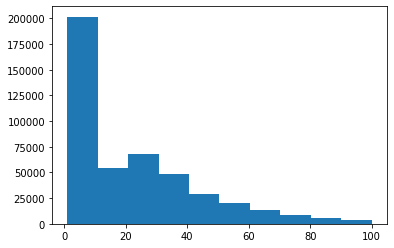

In [43]:
plt.hist(x=rep1_STARR['collapsed_count'], range=(1, 100))

In [4]:
joined = rep1_STARR.merge(rep2_STARR, on='sequence', how='inner', suffixes=('_1', '_2'))
joined.describe()

,count_1,collapsed_count_1,count_2,collapsed_count_2
count,361503.000000,361503.000000,361503.000000,361503.000000
mean,320.079806,26.447573,306.733914,26.548018
std,366.562079,27.020483,292.907575,23.186990
min,1.000000,1.000000,1.000000,1.000000
25%,16.000000,4.000000,111.000000,10.000000
50%,253.000000,21.000000,233.000000,21.000000
75%,463.000000,38.000000,429.000000,37.000000
max,7680.000000,492.000000,10461.000000,649.000000


In [5]:
joined_filtered = joined.loc[(joined['collapsed_count_1'] > 50) & (joined['collapsed_count_2'] > 50)]

<AxesSubplot:xlabel='collapsed_count_1', ylabel='collapsed_count_2'>

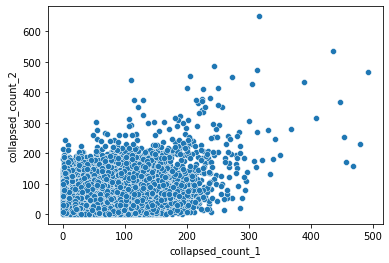

In [6]:
sns.scatterplot(data=joined, x='collapsed_count_1', y='collapsed_count_2')

<AxesSubplot:xlabel='collapsed_count_1', ylabel='collapsed_count_2'>

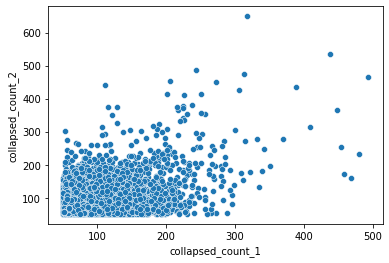

In [7]:
sns.scatterplot(data=joined_filtered, x='collapsed_count_1', y='collapsed_count_2')

In [8]:
len(joined_filtered)

13820

In [9]:
# values = np.vstack([joined["collapsed_count_1"], joined["collapsed_count_2"]])
# kernel = stats.gaussian_kde(values)(values)
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.scatterplot(
#     data=joined,
#     x="collapsed_count_1",
#     y="collapsed_count_2",
#     c=kernel,
#     cmap="viridis",
#     ax=ax,
# )

<AxesSubplot:xlabel='count_1', ylabel='count_2'>

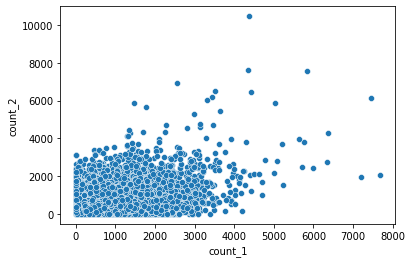

In [10]:
sns.scatterplot(data=joined, x='count_1', y='count_2')

In [11]:
stats.pearsonr(joined['collapsed_count_1'], joined['collapsed_count_2'])

(0.24253372534709114, 0.0)

In [12]:
stats.pearsonr(joined_filtered['collapsed_count_1'], joined_filtered['collapsed_count_2'])

(0.39040691234451247, 0.0)

In [13]:
stats.pearsonr(joined['count_1'], joined['count_2'])

(0.20574367890169068, 0.0)

In [14]:
rep1_STARR_DNA = pd.read_csv('counts/STARR_DNA_rep1_counts.txt', sep='\t', names=['sequence', 'count'])
rep1_STARR_DNA.describe()

,count
count,839776.000000
mean,30.587678
std,26.926581
min,0.000000
25%,11.000000
50%,25.000000
75%,43.000000
max,445.000000


In [15]:
rep2_STARR_DNA = pd.read_csv('counts/STARR_DNA_rep2_counts.txt', sep='\t', names=['sequence', 'count'])
rep2_STARR_DNA.describe()

,count
count,873831.000000
mean,47.340019
std,44.291297
min,0.000000
25%,15.000000
50%,37.000000
75%,67.000000
max,1012.000000


In [16]:
joined_DNA = rep1_STARR_DNA.merge(rep2_STARR_DNA, on='sequence', how='inner', suffixes=('_1', '_2'))
joined_DNA.describe()

,count_1,count_2
count,780868.000000,780868.000000
mean,32.793997,52.791426
std,26.645801,43.759636
min,1.000000,1.000000
25%,13.000000,22.000000
50%,27.000000,43.000000
75%,45.000000,72.000000
max,445.000000,1012.000000


<AxesSubplot:xlabel='count_1', ylabel='count_2'>

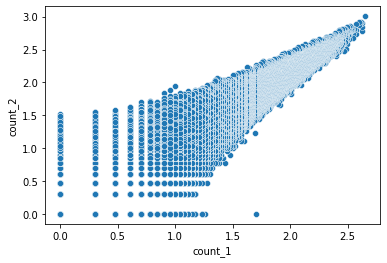

In [17]:
sns.scatterplot(x=np.log10(joined_DNA['count_1']), y=np.log10(joined_DNA['count_2']))

In [18]:
joined_DNA_RNA = joined.merge(joined_DNA, on='sequence', how='inner', suffixes=('_RNA', '_DNA'))
joined_DNA_RNA

,sequence,count_1_RNA,collapsed_count_1,count_2_RNA,collapsed_count_2,count_1_DNA,count_2_DNA
0,TGTTACAGACGGGCGGTCGATGACTGCACTGGGTCTGGACATTTAG...,1,1,290,27,15,25
1,CTACAGATGCAGGGAGTAGTAGTCTTCTGTTTTAGTTTTACATACT...,1914,148,1157,80,139,208
2,TGGGGGTAGGGTCCAGCTACTGTATTATCCAGAACTCGCGAAATGG...,72,11,379,43,73,96
3,GTTCACTTTAGACGTGGGTCTATGGTTAAGCAGTGAAATCGTGTTG...,1,1,472,33,44,63
4,GACGTTTAGACTCCCTGAAATTGGCTCTGTACTAATCAACGAACAA...,1906,131,61,11,66,94
...,...,...,...,...,...,...,...
358832,CTATATAACGACATTTCATTACCCGGCTGTGCACCCTGAGGCGGAC...,1,1,125,9,17,26
358833,TTATTTACGGTTCTCAGTCTACTAAGCTAGAACAATTGTGATCGTA...,833,59,3,3,55,90
358834,CGATATCTACCTTAAAATCCTCGGAAAATGATGAATGCGGCGCGAG...,48,10,465,55,37,58
358835,TCAATGGCGATGGCAGTATATCTTCGGGCTTTTATTAAGTGGTCTG...,14,5,278,29,25,42


In [20]:
joined_DNA_RNA['avg_DNA'] = (joined_DNA_RNA['count_1_DNA'] + joined_DNA_RNA['count_2_DNA'])/2
joined_DNA_RNA['RNA_1_norm'] = (joined_DNA_RNA['collapsed_count_1'] / joined_DNA_RNA['avg_DNA'])
joined_DNA_RNA['RNA_2_norm'] = (joined_DNA_RNA['collapsed_count_2'] / joined_DNA_RNA['avg_DNA'])

<AxesSubplot:xlabel='RNA_1_norm', ylabel='RNA_2_norm'>

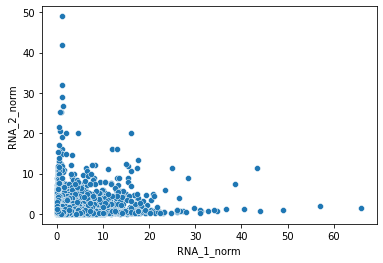

In [22]:
sns.scatterplot(data=joined_DNA_RNA, x='RNA_1_norm', y='RNA_2_norm')

In [23]:
stats.pearsonr(joined_DNA_RNA['RNA_1_norm'], joined_DNA_RNA['RNA_2_norm'])

(0.12145442042196829, 0.0)

In [33]:
joined_DNA_RNA_filtered = joined_DNA_RNA.loc[(joined_DNA_RNA['collapsed_count_1'] > 30) & (joined_DNA_RNA['collapsed_count_2'] > 30) & (joined_DNA_RNA['avg_DNA'] > 20)]
len(joined_DNA_RNA_filtered)

51217

<AxesSubplot:xlabel='RNA_1_norm', ylabel='RNA_2_norm'>

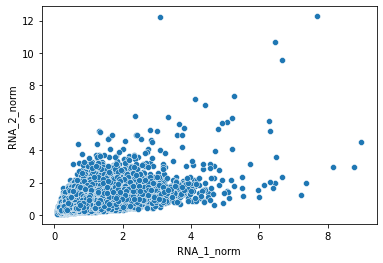

In [37]:
sns.scatterplot(x=joined_DNA_RNA_filtered['RNA_1_norm'], y=joined_DNA_RNA_filtered['RNA_2_norm'])

<AxesSubplot:xlabel='RNA_1_norm', ylabel='RNA_2_norm'>

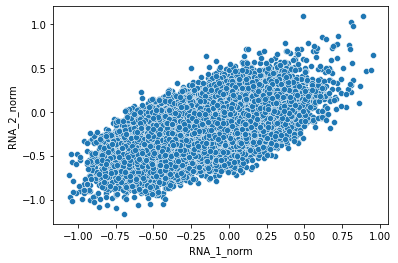

In [36]:
sns.scatterplot(x=np.log10(joined_DNA_RNA_filtered['RNA_1_norm']), y=np.log10(joined_DNA_RNA_filtered['RNA_2_norm']))

In [35]:
stats.pearsonr(joined_DNA_RNA_filtered['RNA_1_norm'], joined_DNA_RNA_filtered['RNA_2_norm'])

(0.5456441876757818, 0.0)

In [44]:
spike_in = pd.read_csv('opoolsentry_spike_in.csv', names=['pool', 'sequence'])
spike_in['sequence'] = spike_in['sequence'].str.upper()
spike_in_seqs = [seq[33:133] for seq in spike_in['sequence']]
spike_in_seqs = set(spike_in_seqs)

In [45]:
rep1_DNA_seqs = set(rep1_STARR_DNA['sequence'])

In [47]:
found = [i for i in spike_in_seqs if i in rep1_DNA_seqs]
print(found)

['GCTGTCCTGATTTAACATTGTTAATGAAACTTGTATAACACAATGCTTGAGTTTAAGACCCACTGAGAACATGACCACATACCTCCTTTCATCTCTACAT', 'AGAGCCATATTTCTCTTCTTTCAAAAGCAAATGGGAGAAATATCGCTGAATTCTTTTTCTCAGCATGGAACATCCCCTGAGAAAGAGAATGCACACCTGG', 'CCTGTCCTTGAGCCTCAGTGTCCCTATCTATCGATGGGGCTCATAAAAGATCCCACCTTGAAGGGAGGTGGTGACCACAAATGAGACAGTGGACAGGATG', 'TCTTTGGGGAAAAAAATGAGTTCAGACCTGAGAAATGAAGGGTTAATACTCATTGAATTTTCACTTTCATGGAGAGGCTGCATTTGAAGCAAAACCCCGC', 'CAGACTCCCCCACCTCACCCCTTCTGGGACTCCAGAGCTGAGCTCATTCATATGCAAATCCCTTCAGCAACTTGGAGGCTGGGCCCCAAACAGTTCAGGA', 'AACATTTGGAAAAAAAGGAGGCCTTTCTTAAGGTCAGAGCACATTGTCATGCAAGGGCTCAGACTCCTGGCCTTGGCCGCCTTGTTCTTTCATCCTCTTT', 'TTAGGGAATTTTATGCCACACAATCTCTGACAAAGCCCAAGAAGGTTGGCCTCTTTGGCCTTTGTGATGCAAATTTCTGGGAGAGCCCTCAAGAGCTGTT', 'AGGGGTTGTAGAAGACAAGGCCCTTGTTATGCAGATGAAGTCTCCTAAGTGGCAGCGCTCAGAGAACATGTGACCAGGGTCAGCTTGGAATTTGGGATCT', 'ATGTCAAAAGACTTTGGTTTGTTATGCAAGACAGTGGTCCAGTGACTTTGCATATCACATTCTCTTAACATGAGGGAAATCCTTGCATGCTAATTGGAGA', 'TACAGATTGGGTTGCTGGGAGATGAAAGGGGGCCCCTTTTGTTATGAAAATGAAGGGAGATG

In [48]:
import json

In [50]:
with open('found.json', 'r') as f:
    found_Sahu = json.load(f)
found_Sahu

['GCTGTCCTGATTTAACATTGTTAATGAAACTTGTATAACACAATGCTTGAGTTTAAGACCCACTGAGAACATGACCACATACCTCCTTTCATCTCTACAT',
 'TCTTTGGGGAAAAAAATTAGTTCAGACCTGAGAAATGAAGGGTTAATACTCATTGAATTTTCACTTTCATGGAGAGGCTGCATTTGAAGCAAAACCCCGC',
 'TAAACCTGCAGTACTAAACCTGGGATAGAGACATTATTCTCTCTATCCCAGTAATTCCTGCATTACTATGCAGGAATGCAGTAATTCCTGCATTACTATG',
 'ACTAATTCCTGGAGGCAGTACAGACTCCCCTGGAGAGTGCCTTTCATATGCAAACCAACCAACCCAGAGTCCACATACCCACCTCCTTTCACACTTGGGG',
 'CCCATTTTCTGAGGAGAAATTCAAGCTAGCTGCAGTAATTTGCATAAGTAATTTGCATAAGAATGTTAATCACCAAGACAATGGGGAAAATGTCTCCAGG',
 'ATTCCATTCGGGTCCGTTCGAAGATTCTCTTCGATTCCATTCGATAATTCCGTTTTTTTCCGTTTGGTGTTGATACCATTCGATTCCATTCGATGATAAT',
 'CCTGCTATTGAGACTAGGTGAGGAGGGAGGTGGCAAGGGAGAGGAAGAGCAAAGGCATGAGATGAATTACCTAATACACAGACAGCTCATGAAGAGTGAC',
 'ATCTCAGTGAGCAGAGGGATGACTTTGAAAAGAAACGGAAGCAGGTTTGTCCTAAGCAGTTCCCAGCTTGATTTTCCCTTTAGCTCAGTGATTTTTGGTG',
 'TTTGTGATGTATTTTTATAGTCGCTGATCTGCCTCTTTAAATAGAGTCCCTGAGACGATGGCTCTTTTGTTGGAGGATTCATGAAGTTGCCTCCTCTAAT',
 'TCCCAGTTGCCTTTGAGATGCCAGGTGACAGTCCTCAATTCCTGCTGCTTTGT

In [51]:
found = set(found)
sum(i in found for i in found_Sahu)

33

In [53]:
sum(i in spike_in_seqs for i in rep2_STARR['sequence'])

50

In [56]:
joined_DNA_RNA.loc[joined_DNA_RNA['sequence'].isin(spike_in_seqs)]

,sequence,count_1_RNA,collapsed_count_1,count_2_RNA,collapsed_count_2,count_1_DNA,count_2_DNA,avg_DNA,RNA_1_norm,RNA_2_norm
361,GGCAAATGGGAAGGGCAAGGTCACAAGGCCAGGGTGAAACTGGGAT...,65,12,96,8,80,138,109.0,0.110092,0.073394
46895,GACCCGCTGAATCAGAATCTGCATTTTAACAAGATCCCCAGGTGAT...,8,6,467,41,99,118,108.5,0.055300,0.377880
50878,CCACCCCCACCCACCCACAGGCCTAGGAAGCCAGGCTCCTTCCTCT...,546,50,456,33,68,110,89.0,0.561798,0.370787
73829,ACCCTTAATTTGCACTTCCAAAGACATGACTCTTAAGTGAAAATTT...,361,36,238,17,52,87,69.5,0.517986,0.244604
188958,GGAGAATCTTAACAGAAAAGCTAAACAGAAGCATTCTCAGAAACTT...,3,3,296,33,47,87,67.0,0.044776,0.492537
195541,TAAACCTGCAGTACTAAACCTGGGATAGAGACATTATTCTCTCTAT...,1,1,343,32,49,69,59.0,0.016949,0.542373
247840,ATCTCAGTGAGCAGAGGGATGACTTTGAAAAGAAACGGAAGCAGGT...,664,40,266,41,80,125,102.5,0.390244,0.400000
268544,CCTTAAGACTTATAGAACAGACTCTTTAAGTCTGATAGGAAACATT...,992,67,1486,99,66,120,93.0,0.720430,1.064516
342590,TTCTTTTGTCCTGGCCACCTGAACAACTCAGTCCTGGGAGTCCTGA...,400,23,924,78,88,99,93.5,0.245989,0.834225


In [59]:
joined_DNA_RNA_filtered['motif'] = joined_DNA_RNA_filtered['sequence'].str.contains(r'[ACG]ATTT[AG]CAT[ACG]ACAAT[AG][ACG]')

C:\Users\nmateyko\AppData\Local\Temp\ipykernel_18228\2073061594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_DNA_RNA_filtered['motif'] = joined_DNA_RNA_filtered['sequence'].str.contains(r'[ACG]ATTT[AG]CAT[ACG]ACAAT[AG][ACG]')


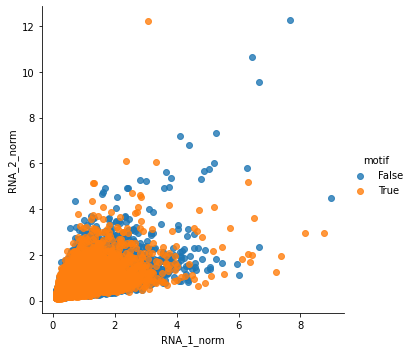

In [63]:
sns.lmplot(data=joined_DNA_RNA_filtered, x="RNA_1_norm", y="RNA_2_norm", fit_reg=False, hue='motif')

In [64]:
len(joined_DNA_RNA_filtered)

51217

In [65]:
with_motif = joined_DNA_RNA_filtered.loc[joined_DNA_RNA_filtered['motif']]


In [66]:
stats.pearsonr(with_motif['RNA_1_norm'], with_motif['RNA_2_norm'])

(0.5490209789469411, 0.0)

In [67]:
no_motif = joined_DNA_RNA_filtered.loc[~joined_DNA_RNA_filtered['motif']]

In [68]:
stats.pearsonr(no_motif['RNA_1_norm'], no_motif['RNA_2_norm'])

(0.5411806682460959, 0.0)